Ismail Elnaggar <br>
student number519208 <br>
imelna@utu.fi  <br>
February, 03, 2020  <br>

# Exercise 3 | TKO_2096 Application of Data Analysis 2020
## Pain assessment from biosignal data

# ¤¤¤¤ Instructions ¤¤¤¤
K-Nearest Neighbor Classification with euclidean distance for pain intensity level prediction using biosignal features.

## Remember
Follow the general guidelines in Moodle -- except that no pdf is needed for this exercise, especially
- document in detail all the steps of your work: explain at each step what you are doing and why, include the code you wrote, the resulting plots and/or numbers, and analysis of the results
- The code should be runnable as is, so the course assistants can verify your results
- Plagiarism: trying to pass another persons work as your own result is strictly forbidden, see https://www.utu.fi/en/guidelines-for-misconduct-and-fraud-at-utu
- Contact the course assistant responsible for the exercise if you need guidance, try to do this **well before the deadline**

## Evaluation
Fail/Pass/Pass with honors (+1)<br>
Getting +1 requires a completely correct solution and also thorough analysis and discussion of the results. Bonus points are directly added to your exam points.

## Data description:
- Original data source (open data): https://datadryad.org/stash/dataset/doi:10.5061/dryad.2b09s
- Article describing study setup, features etc.: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0140330

From the original zipped Excel, sheet 'Extracted_Features', out of 159 original biopotential features<br>
**nine features were chosen for your analysis:**

muscle **zygomaticus** electromyography (EMG)<br>
'CH22_Sim-corr' <br>
muscle **corrugator** electromyography (EMG)<br>
'CH23_Sim-corr', 'CH23_A-P2P', 'CH23_E-Shannon'<br>
muscle **trapezius** electromyography (EMG)<br>
'CH24_Sim-corr'<br><br>
**electrocardiography** (ECG)<br>
'CH25_meanRR', 'CH25_slopeRR'<br><br>
**electrodermal activity** (EDA)<br>
'CH26_A-P2P','CH26_A-RMS'

## Tasks:

<b>Data upload:</b><br>
1. Read data from the open data source https://raw.githubusercontent.com/elmasyr/ada/master/ex3_biovid_subset.csv<br>
Note! Use the url to obtain the data, not a local copy of the file.<br>
2. Check the uploaded data shortly. Note that the file contains more data than the listed features. Make sure you understand what is included in the dataset before proceeding. 

<b>Preprocessing:</b><br>
3. Check the two label columns "Label" and "Label_ord" distribution, answer the question i)--iii)
4. Check the descriptive statistics of the features, answer the question iv)
5. Standarize data using z-score.
6. Check the descriptive statistics of the standardized features, answer the question v)
7. Validate the c-index code you use (your own or library version)

<b>Analysis:</b><br>
7. With kNN classification (k=29), implement *your own Leave-Subject-Out cross-validation* (do not used ready-made libraries)<br>
Note! For kNN you can use e.g. sklearn kNN classifier
8. Report the C-index for each subject fold and average performance
9. Report also min, max and standard deviation of the C-indices
10. Answer the question vi)

## Bonus task: Leave-One-Out cross-validation

## Exercise submission instructions
- Report format<br>
    - Name your work ada2019_ex3_johnson.ipynb or similarly, i.e. include your name in the filename<br>
    - Return the jupyter notebook (.ipynb) -- NO pdf, zipped file, .py etc. please<br>
- Deadline
    - Wed 2020-02-05 at 23:59

## Before submitting your work:
- Check once more the instructions.
- Clean it, i.e. remove all irrelevant code and text, including library imports and functions.
- Does my code run in a feasible time? i.e. can the customer check and run the code.
- Are all reported items clearly in the jupyter notebook? Have I answered all the questions?
- Before submitting, with the jupyter notebook: 
    - Kernel -> Restart and run all 
    - If not error messages, save the file.
- Is the correct version submitted?

# ¤¤¤¤ Exercise work ¤¤¤¤

## Import libraries

In [1]:
# In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

## Read and visualize the dataset

### Upload the data and check the data dimesions (# of rows and columns)

In [2]:
# In this cell read the file from url https://raw.githubusercontent.com/elmasyr/ada/master/ex3_biovid_subset.csv
url="https://raw.githubusercontent.com/elmasyr/ada/master/ex3_biovid_subset.csv"
bioDF=pd.read_csv(url)

In [3]:
# Print the dataset dimesions (i.e. number of rows and columns)
print ("The datset includes {0} rows and {1} columns".format(bioDF.shape[0],bioDF.shape[1]))

The datset includes 4140 rows and 12 columns


### Checks
- dataset columns (assuming you use pandas), otherwise find some other methods to check the data content and printout the column names of the csv file
- check the subject numbering output and format

In [4]:
# Print here the column names
print ("Column names: \n",list(bioDF.columns))

Column names: 
 ['Subject-ID', 'Label', 'Label_ord', 'CH22_Sim-corr', 'CH23_A-P2P', 'CH23_E-Shannon', 'CH23_Sim-corr', 'CH24_Sim-corr', 'CH26_A-P2P', 'CH26_A-RMS', 'CH25_meanRR', 'CH25_slopeRR']


In [5]:
# Print out first five (5) unique subject identifications
print ("The first five unique subject IDs are:",bioDF["Subject-ID"].unique()[:5])

The first five unique subject IDs are: ['20120713-09_w_21' '20120713-13_m_41' '20120716-14_m_20'
 '20120717-09_w_23' '20120718-14_w_23']


### Plot 
- Plot all features (or numeric columns) in one plot (preferably subplots)<br>
Note! plot should be visible in the jupyter notebook

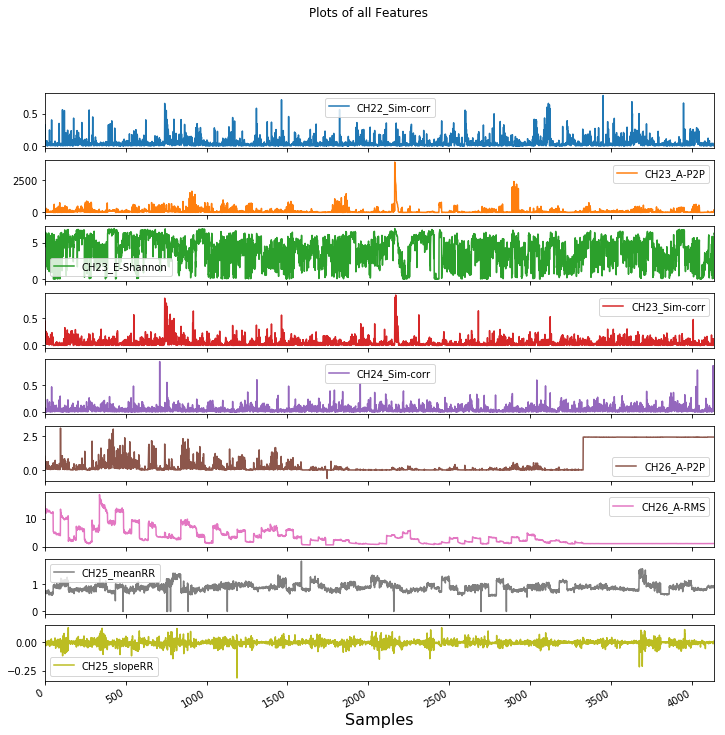

In [6]:
# Plot here all features
bioDF.iloc[:,3:].plot(subplots=True,figsize=(12,12),title="Plots of all Features")
plt.xlabel('Samples',fontsize=16)
plt.show()

## Preprocessing

### Printout or plot the distribution of the column 'Label'

In [7]:
# Write your code here
print ("Count of each label: \n",bioDF["Label"].value_counts(),"\n")

print ("Percent distribution of each label: \n",(bioDF["Label"].value_counts()/len(bioDF))*100)

Count of each label: 
 level_zero    1700
level_four    1388
level_one     1052
Name: Label, dtype: int64 

Percent distribution of each label: 
 level_zero    41.062802
level_four    33.526570
level_one     25.410628
Name: Label, dtype: float64


### <span style='background :yellow'> Questions i-ii </span>
i) Is the label evenly distributed?<br>
ii) Is the label order logical? Can this label be used in comparing relative ordering/ranking of the data points?

Answer here:<br>
i) No the labels are not evenly distributed, level_zero is the majority label accounting for 41% of the total <br>

ii) Yes because these are ordinal variables, variable whose value exists on an arbitrary scale where only the relative ordering between different values is significant.

### Printout or plot the distribution of the column 'Label_ord'

In [8]:
# Write your code here
print (bioDF["Label_ord"].value_counts())

0    1700
4    1388
1    1052
Name: Label_ord, dtype: int64


### <span style='background :yellow'> Question iii </span>
iii) Which one of the labels should be used in classification? Why?

Answer here:<br>
iii) The numeric labels ("Label_ord"), because some classifiers cannot handle string inputs and may order the inputs alphabetically instead of the way they are intended to be ordered.

## Standardization

### Print the descriptive statistics of the features 
- at least count, mean, std, min and max need to be shown
- no plotting

In [9]:
# Write your code here
bioDF.iloc[:,3:].describe()

,CH22_Sim-corr,CH23_A-P2P,CH23_E-Shannon,CH23_Sim-corr,CH24_Sim-corr,CH26_A-P2P,CH26_A-RMS,CH25_meanRR,CH25_slopeRR
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,0.050570,96.920191,3.826557,0.049376,0.047911,0.595780,3.290203,0.899374,-0.003644
std,0.078804,228.176970,1.923046,0.078477,0.059807,0.943576,2.981606,0.153013,0.024603
min,0.000000,0.000000,0.000000,0.000000,0.000009,-0.624000,0.599959,0.000000,-0.316685
25%,0.010236,9.661825,2.396241,0.010339,0.013272,0.017000,1.104965,0.805891,-0.013393
50%,0.023109,24.579779,4.149482,0.023902,0.029851,0.075500,2.220256,0.883234,-0.002344
75%,0.053026,75.453260,5.438858,0.054453,0.059539,0.566250,4.130034,0.978207,0.006452
max,0.778670,3939.213771,6.958736,0.920511,0.936077,3.095000,18.663143,1.856916,0.131641


### <span style='background :yellow'> Question iv </span>
iv) Why do the features need to be standardized?

Answer here:<br>
iv) Rescaling of data is performed to adjust the features with similar scaling to the vector space. When comparing different features, if the scales of the features are very different some features might dominate others that are in a different smaller order of magnitude

### Standardize the dataset features using z-score standardization

In [10]:
#Use this cell for the z-score standardization
cols=list(bioDF.iloc[:,3:].columns)
for col in cols:
    col_zscore = col + '_ZS' #add ZS to each feature name to indicated z-score
    bioDF[col_zscore] = (bioDF[col] - (bioDF[col].mean()))/(bioDF[col].std(ddof=0))

bioZSDF=bioDF.copy() #copy just to keep original features somewhere
bioZSDF.drop(cols,inplace=True,axis=1) #drop original features from z-score dataframe

### Check the outcome, descriptive statistics of the standardized features
- at least count, mean, std, min and max need to be shown

In [11]:
# Write your code here
bioZSDF.iloc[:,3:].describe()

,CH22_Sim-corr_ZS,CH23_A-P2P_ZS,CH23_E-Shannon_ZS,CH23_Sim-corr_ZS,CH24_Sim-corr_ZS,CH26_A-P2P_ZS,CH26_A-RMS_ZS,CH25_meanRR_ZS,CH25_slopeRR_ZS
count,4.140000e+03,4.140000e+03,4.140000e+03,4.140000e+03,4.140000e+03,4.140000e+03,4.140000e+03,4.140000e+03,4.140000e+03
mean,4.838923e-16,2.513086e-16,1.180591e-15,-6.948012e-16,1.544355e-15,7.713100e-16,-6.849057e-16,-3.104294e-15,-7.153564e-16
std,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00
min,-6.417909e-01,-4.248102e-01,-1.990082e+00,-6.292563e-01,-8.010432e-01,-1.292876e+00,-9.023896e-01,-5.878487e+00,-1.272527e+01
25%,-5.118783e-01,-3.824615e-01,-7.438658e-01,-4.974914e-01,-5.792534e-01,-6.134636e-01,-7.329950e-01,-6.110246e-01,-3.963096e-01
50%,-3.485069e-01,-3.170747e-01,1.679440e-01,-3.246480e-01,-3.020207e-01,-5.514580e-01,-3.588926e-01,-1.054939e-01,5.284110e-02
75%,3.117413e-02,-9.409155e-02,8.385109e-01,6.469106e-02,1.944480e-01,-3.129955e-02,2.817045e-01,5.152693e-01,4.104036e-01
max,9.240501e+00,1.684113e+01,1.628956e+00,1.110181e+01,1.485236e+01,2.648987e+00,5.156549e+00,6.258684e+00,5.499361e+00


### <span style='background :yellow'> Question v <span>
v) What are the mean and the standard deviation of the standardized features?

In [12]:
print ("Mean Values of the standardized features:\n",bioZSDF.iloc[:,3:].mean(),"\n")
print("Standard deviation of the standardized features: \n",bioZSDF.iloc[:,3:].std() )

Mean Values of the standardized features:
 CH22_Sim-corr_ZS     4.838923e-16
CH23_A-P2P_ZS        2.513086e-16
CH23_E-Shannon_ZS    1.180591e-15
CH23_Sim-corr_ZS    -6.948012e-16
CH24_Sim-corr_ZS     1.544355e-15
CH26_A-P2P_ZS        7.713100e-16
CH26_A-RMS_ZS       -6.849057e-16
CH25_meanRR_ZS      -3.104294e-15
CH25_slopeRR_ZS     -7.153564e-16
dtype: float64 

Standard deviation of the standardized features: 
 CH22_Sim-corr_ZS     1.000121
CH23_A-P2P_ZS        1.000121
CH23_E-Shannon_ZS    1.000121
CH23_Sim-corr_ZS     1.000121
CH24_Sim-corr_ZS     1.000121
CH26_A-P2P_ZS        1.000121
CH26_A-RMS_ZS        1.000121
CH25_meanRR_ZS       1.000121
CH25_slopeRR_ZS      1.000121
dtype: float64


### As you can see above the mean of the Z-Score features now are very close to 0 and the std is approximately 1.

## C-index code 

In [13]:
'''given true labels and corresponding predictions, 
calculates the C-index score
Note! You can also use an existing library version of the concordance index'''

def cindex(true_labels, pred_labels):
    """Returns C-index between true labels and predicted labels""" 
    n = 0
    n_sum = 0
    for i in range(len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1,len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if t != nt:
                n += 1
                if (p < np and t < nt) or (p > np and t > nt):
                        n_sum +=  1
                elif p == np:
                    n_sum += 0.5     
    return (n_sum/n)

### Test c-index function

In [14]:
#test cindex function with following values
#additionally you can add your own short test to show 
true_labels = [0, 1, 4, 0, 4]
predictions = [4, 1, 4, 0, 4]
cindx = cindex(true_labels, predictions)
print(cindx)

0.75


## Analysis

With kNN classification (k=29), implement Leave-Subject-Out cross-validation and calculate the C-index for each subject
- printout the C-indices for 10 fist subjects
- calculate and printout average of all subject fold C-indices
- calculate and printout the min, max, standard deviation of all subject specific C-indices

### Functions

In [15]:
# Include here all the functions that you need to run in the data analysis part.
# If you have several functions, consider putting them in separate cells, might make the testing and browsing easier
#table
#### did not create any functions for this exerise

### Results for Leave-Subject-Out cross-validation

In [16]:
# In this cell run your script for leave-Subject-Out cross-validation and print the C-indices for 10 first subject folds.
# In this cell, or in an additional one, printout the average of all indices.
# In this cell, or in an additional one, printout the min, max and std of all indices.
k=29
knn = KNeighborsClassifier(n_neighbors=k)

###### Label_ord ######
features=list(bioZSDF.iloc[:,3:])
target=["Label_ord"]
individualpred=[]
individualtest=[]
testextended=[]
predextended=[]

for i in list(bioZSDF["Subject-ID"].unique()):
    #get the test group
    testgroup=bioZSDF[bioZSDF["Subject-ID"] == i]
    xtest=testgroup[features]
    ytest=testgroup[target].values.ravel()
    #get all other groups
    traingroup=bioZSDF[bioZSDF["Subject-ID"] != i]
    xtrain=traingroup[features]
    ytrain=traingroup[target].values.ravel()
    
    #train classifier
    knn.fit(xtrain,ytrain)
    #get predictions
    ypred=knn.predict(np.array(xtest))
    #extend true and predicted values onto the empty lists
    testextended.extend(np.array(ytest).flatten()) #all tests extended together
    predextended.extend(ypred.flatten()) #all predictions extended together
    
    individualtest.append(np.array(ytest).flatten()) #list of lists of each test set
    individualpred.append(ypred.flatten()) #list of lists of each prediction set

#my_cindex=cindex(my_tests,my_predictions)  #apply cindex function to true and predicted values
#print ("Cindex =",my_cindex)
print  ("completed")




completed


### Answers


In [17]:
cind_list=[]
print ("the C-indices for 10 first subject folds:\n")
for c in range(10):
    cindex10=cindex(individualtest[c],individualpred[c])  #apply cindex function to true and predicted values
    print ("subject fold {0} C-index = {1}".format(c,cindex10))
print("")
for c in range(len(individualtest)):
    cind=cindex(individualtest[c],individualpred[c])
    cind_list.append(cind)
print ("The average C-index of all indices is:",np.mean(cind_list),"\n")

print ("The Min C-index was:",np.min(cind_list),"\n")
print ("The Max C-index was:",np.max(cind_list),"\n")
print("The Std of all C-indicies was:",np.std(cind_list),"\n")


the C-indices for 10 first subject folds:

subject fold 0 C-index = 0.6681564245810055
subject fold 1 C-index = 0.9316770186335404
subject fold 2 C-index = 0.8629441624365483
subject fold 3 C-index = 0.535064935064935
subject fold 4 C-index = 0.8640776699029126
subject fold 5 C-index = 0.8069444444444445
subject fold 6 C-index = 0.8316176470588236
subject fold 7 C-index = 0.6997563946406821
subject fold 8 C-index = 0.8692893401015228
subject fold 9 C-index = 0.6818181818181818

The average C-index of all indices is: 0.7750724099497949 

The Min C-index was: 0.5225479143179256 

The Max C-index was: 0.9316770186335404 

The Std of all C-indicies was: 0.0913672262446539 



### <span style='background :yellow'>Question vi</span> -- Interpretation of results
vi) What is your interpretation on the results?

Answer here: The C-index result can vary significantly depending on the patient. This is pretty typical because people are different from each other so there will be always outlier results where the returned values are much greater or much lower than the mean.  

For example lets say we have 10 patients and 9 of them are of similar age and health. The 10th patient could be much older and in poor health. It wouldn't be unreasonable to expect a model trained on the 9 health patients to produce sub-optimal results when tested on the 10th patients data. This is why it's important and desirable for a dataset to contain an even distribution of samples from different populations of data. Sadly in the real world this isn't always the case and is what makes creating good classifiers that can perform well on unseen data challenging. 

# ¤¤¤¤ Bonus exercise ¤¤¤¤
B1) Calculate the C-index for the previous LSO-CV using all real labels and all predictions (instead of averaging them all)<br>
B2) With kNN classification (k=29), implement Leave-One-Out cross-validation and calculate performance with C-index calculation all real labels and all predictions

### Bonus B1: Calculate the C-index for the previous LSO-CV using all real labels and all predictions

In [18]:
#using all test and predictions at the same time from LSO-CV
#in practice this shouldn't be done
my_cindex=cindex(testextended,predextended)  #apply cindex function to true and predicted values
print ("Cindex =",my_cindex)

Cindex = 0.7714181045673317


### Bonus B2: Results for Leave-One-Out cross-validation

In [19]:
# In this cell run your script for leave-One-Out cross-validation and print the individual C-indices
k=29
knn = KNeighborsClassifier(n_neighbors=k)

###### Label_ord ######
features=list(bioZSDF.iloc[:,3:])
target=["Label_ord"]
my_test=[]
my_pred=[]


for i in range(len(bioZSDF)):
    #test and train sets leave-one-out
    #test sets
    xtest=bioZSDF[features].iloc[i]
    ytest=bioZSDF[target].iloc[i].values.ravel()
    #train sets
    xtrain=pd.concat([bioZSDF[features].iloc[:i],bioZSDF[features].iloc[i+1:]])       
    ytrain=pd.concat([bioZSDF[target].iloc[:i],bioZSDF[target].iloc[i+1:]]).values.ravel()
    
    #train classifier
    knn.fit(xtrain,ytrain)
    #get predictions
    ypred=knn.predict(np.array(xtest).reshape(1, -1) )
    #extend true and predicted values onto the empty lists
    my_test.extend(np.array(ytest).flatten())
    my_pred.extend(ypred.flatten())


In [20]:
my_cindex=cindex(my_test,my_pred)  #apply cindex function to true and predicted values
print ("Cindex =",my_cindex)

Cindex = 0.7897604319122652


### <span style='background :yellow'>Bonus: Questions</span>
vii) Present the results of average C-index performance from the LSO and LOO cross-validation. Do they differ? <br>
viii) What is your interpretation on the results?

Answer here:<br>
vii)LSOCV: 0.7750, LOOCV: 0.7897 LOOCV produces a slightly better score

viii) Leave-One-Out is more optimistic because of the fact that patient data from the same subject is being used to train and test the data. So bias is being introduced to the training set this way.

When dealing with data where samples are not independent of each other, some kind of group wise splitting must be implemented in order to avoid bias to leak into the training data